# Principe

Le tri à bulles consiste à comparer répétitivement les éléments consécutifs d'un tableau. Si une paire d'éléments consécutifs est mal ordonnée, on en permute les éléments. 

Il doit son nom au fait qu'il déplace rapidement les plus grands éléments en fin de tableau, comme des bulles d'air qui remonteraient rapidement à la surface d'un liquide.

Ce tri est mis en oeuvre avec deux boucles imbriquées. 

* La boucle interne itère par indice croissant sur les N-1 paires d'éléments consécutifs pour N éléments. 
* La boucle externe s'effectue autant de fois que nécessaire pour que le tableau soit trié. Dans le pire des cas, l'élément minimum commence à droite, et ne recule que d'un indice par boucle interne. Il faut alors que la boucle externe s'effectue N-1 fois elle aussi.  

In [1]:
TAB = [ 5, 8, 4, 3, 2, 6, 7, 1 ]

# Mise en oeuvre

In [2]:
def echangeSiNecessaire( A, i, verbose = True):        
    # Après cette fonction, A[i] <= A[i+1]
    
    print(A, end = " => ")

    if A[i] > A[i+1]:
        A[i], A[i+1] = A[i+1], A[i]    # swap 
        print(A)
    else:
        print("Inchangé")
        
    return;

In [3]:
T = TAB.copy()

echangeSiNecessaire(T,2);

[5, 8, 4, 3, 2, 6, 7, 1] => [5, 8, 3, 4, 2, 6, 7, 1]


In [4]:
echangeSiNecessaire(T,2);

[5, 8, 3, 4, 2, 6, 7, 1] => Inchangé


## Un passage sur toutes les paires d'éléments

In [5]:
def boucleInterne(A):
    N = len(A)
    for i in range(0,N-1):  
        echangeSiNecessaire(A,i) 
    return;

In [6]:
T = TAB.copy()

boucleInterne(T);

[5, 8, 4, 3, 2, 6, 7, 1] => Inchangé
[5, 8, 4, 3, 2, 6, 7, 1] => [5, 4, 8, 3, 2, 6, 7, 1]
[5, 4, 8, 3, 2, 6, 7, 1] => [5, 4, 3, 8, 2, 6, 7, 1]
[5, 4, 3, 8, 2, 6, 7, 1] => [5, 4, 3, 2, 8, 6, 7, 1]
[5, 4, 3, 2, 8, 6, 7, 1] => [5, 4, 3, 2, 6, 8, 7, 1]
[5, 4, 3, 2, 6, 8, 7, 1] => [5, 4, 3, 2, 6, 7, 8, 1]
[5, 4, 3, 2, 6, 7, 8, 1] => [5, 4, 3, 2, 6, 7, 1, 8]


## Tous les passages

In [7]:
T = TAB.copy()

N = len(T)
for i in range(0,N-1): 
    boucleInterne(T)
    print("")

[5, 8, 4, 3, 2, 6, 7, 1] => Inchangé
[5, 8, 4, 3, 2, 6, 7, 1] => [5, 4, 8, 3, 2, 6, 7, 1]
[5, 4, 8, 3, 2, 6, 7, 1] => [5, 4, 3, 8, 2, 6, 7, 1]
[5, 4, 3, 8, 2, 6, 7, 1] => [5, 4, 3, 2, 8, 6, 7, 1]
[5, 4, 3, 2, 8, 6, 7, 1] => [5, 4, 3, 2, 6, 8, 7, 1]
[5, 4, 3, 2, 6, 8, 7, 1] => [5, 4, 3, 2, 6, 7, 8, 1]
[5, 4, 3, 2, 6, 7, 8, 1] => [5, 4, 3, 2, 6, 7, 1, 8]

[5, 4, 3, 2, 6, 7, 1, 8] => [4, 5, 3, 2, 6, 7, 1, 8]
[4, 5, 3, 2, 6, 7, 1, 8] => [4, 3, 5, 2, 6, 7, 1, 8]
[4, 3, 5, 2, 6, 7, 1, 8] => [4, 3, 2, 5, 6, 7, 1, 8]
[4, 3, 2, 5, 6, 7, 1, 8] => Inchangé
[4, 3, 2, 5, 6, 7, 1, 8] => Inchangé
[4, 3, 2, 5, 6, 7, 1, 8] => [4, 3, 2, 5, 6, 1, 7, 8]
[4, 3, 2, 5, 6, 1, 7, 8] => Inchangé

[4, 3, 2, 5, 6, 1, 7, 8] => [3, 4, 2, 5, 6, 1, 7, 8]
[3, 4, 2, 5, 6, 1, 7, 8] => [3, 2, 4, 5, 6, 1, 7, 8]
[3, 2, 4, 5, 6, 1, 7, 8] => Inchangé
[3, 2, 4, 5, 6, 1, 7, 8] => Inchangé
[3, 2, 4, 5, 6, 1, 7, 8] => [3, 2, 4, 5, 1, 6, 7, 8]
[3, 2, 4, 5, 1, 6, 7, 8] => Inchangé
[3, 2, 4, 5, 1, 6, 7, 8] => Inchangé

[3, 2, 4, 5,

## En résumé

Le tri à bulles effectue deux boucles imbriquées de N-1 itérations. La boucle interne parcourt toutes les paires d'éléments consécutifs. La boucle externe s'effectue suffisamment de fois pour que le résultat soit trié

In [8]:
T = TAB.copy()
print("A trier: ",T)

N = len(T)
for j in range(0,N-1): 
    for i in range(0,N-1):
        if T[i] > T[i+1]:
            T[i],T[i+1] = T[i+1],T[i]   # swap
            
print("Trié: ",T)

A trier:  [5, 8, 4, 3, 2, 6, 7, 1]
Trié:  [1, 2, 3, 4, 5, 6, 7, 8]


# Visualisation

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def affiche(T,it):
    plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')
    plt.title('Iteration {0}'.format(it))
    plt.show()

In [10]:
T = np.random.randint(0,100,30)

N = len(T)
it = 0

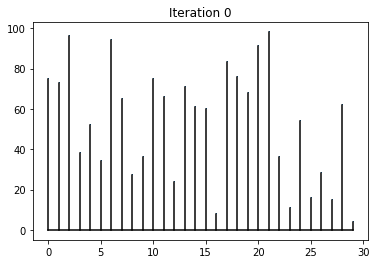

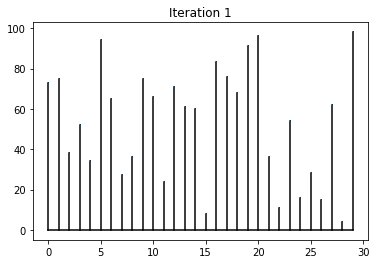

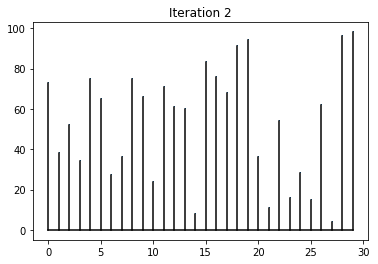

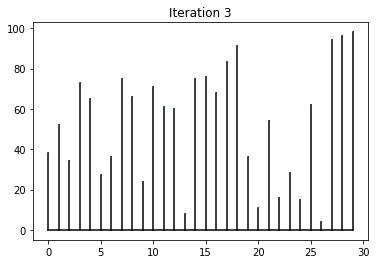

In [11]:
affiche(T,it)

nombreIterations = 3

for j in range(0,nombreIterations):

    for i in range(0,N-1):
        if T[i] > T[i+1]:
            T[i],T[i+1] = T[i+1],T[i]   # swap        
    it += 1
    affiche(T,it)